Importando bibliotecas

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

Carregando dataset


In [30]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
titanic = pd.read_csv('datasets/gender_submission.csv')

Conhecendo algums informações sobre o dataset

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Com este comando conseguimos visualizar quais são as colunas disponiveis, [PassegerID (Identificação do passageiro), Survived (sobreviveu), Pclass (classe do passageiro), Name (Nome), Sex (Sexo), Age (Idade), SibSp (conjuge no navio), Parch (filhos no navio), Ticket (passagem), Fare (tarifa), Cabin (Cabine), Embarked (embarque)] e a memória utilizada na leitura/processamento do arquivo: (+ ou - 83.6KB)


In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Conta a quantidade de linhas no dataset

In [34]:
len(train)

891

Checando valores vazio ou nulos


Podemos agora verificar qual a correlação (influência de uma coluna em relação a outra) entre as colunas numéricas do dataset:

In [35]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Verificando correlação excluindo os campos sem valor

In [23]:
train.dropna().corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.057833,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.352812,0.081656,0.016824,-0.548193
Age,-0.057833,-0.352812,1.000000,-0.231639,-0.154027,0.104553
SibSp,-0.034040,0.081656,-0.231639,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.154027,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.104553,0.160887,0.217532,1.000000


In [24]:
train.describe(include = "all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,"Torber, Mr. Ernst William",Masculino,NaN,NaN,NaN,NaN,Southampton
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,NaN,28.566970,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,NaN,13.199572,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN


Verificando a quantidade de linhas vazias para cada coluna

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### No nosso dataset temos 891 linhas 


Observei que para a idade temos 177 linhas que nao possuem idade
estou supondo que a idade e importante para a sobrevivencia.
Assim vou preencher a idade de forma a nao deixar vazio.
 
Na coluna cabine temos 687 linhas vazias, presumo que seja um dado irrelavante
uma vez que temos a classe do passageiro.




### Obtendo a media de idade para poder preencher as linhas de idade nulas

In [25]:
mode(train['Age']).mode[0]

24.0

#### inputando a media de idade para as linhas vazias

In [26]:
train['Age'].fillna(mode(train['Age']).mode[0], inplace=True)

#### Verificando a correlacao apos ter alimentado a idade onde estava vazio

In [27]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500
Age,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554
SibSp,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000


#### Grafico de bar de sobreviventes por sexo

In [28]:


#### Percentual de sobreviventes sexo Feminino x Masculino
print("Percentual de sexo feminino sobreviventes :", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentual de sexo masculino sobreviventes :", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)


IndexError: index out of bounds

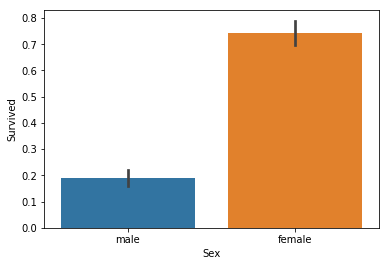

In [14]:

sns.barplot(x="Sex", y ="Survived", data=train)

#### Com este grafico obtivemos a confirmação de que tivemos um numero muito superior de sobreviventes do sexo feminino do que do sexo masculino

# Analise de sobrevivente dividido por classes

#### Grafico dos sobreviventes por clase

In [15]:
print("Percentual de sobreviventes: 1 Classe:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentual de sobreviventes: 2 Classe:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentual de sobreviventes: 3 Classe:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentual de sobreviventes: 1 Classe: 62.96296296296296
Percentual de sobreviventes: 2 Classe: 47.28260869565217
Percentual de sobreviventes: 3 Classe: 24.236252545824847


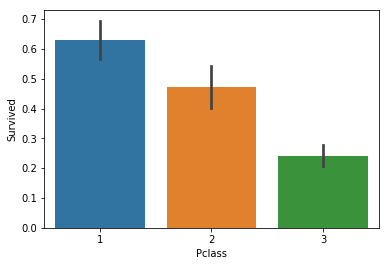

In [16]:
sns.barplot(x="Pclass", y="Survived", data=train)

### Vamos deixas as informações mais claras removendo as informações que nao seram uteis nas analises

In [16]:
train.drop(['Ticket','Cabin','PassengerId'], axis=1, inplace = True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


#### Renomeando as colunas
Obs: não sei se vai ser compensar renomear as colunas, pode afetar nas analises.

In [18]:
#train.columns = ['Sobreviveu?','Classe','Nome','Sexo','Idade','Irmaos/Conjunge','Pais/Criancas','Tarifca','Embarque']
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [17]:
train['Embarked'] = train['Embarked'].replace(['S','Q','C'],['Southampton','Queenstown','Cherbourg'])
train['Sex'] = train['Sex'].replace(['male','female'],['Masculino','Feminino'])

In [18]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,Southampton
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,1,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
4,0,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,Southampton


In [22]:
#Agrupando a proporção de sobrevivente por classe e gerando um gráfico a partir do resultado

sobreviventes_classe = train.copy()
sobreviventes_classe['Survived'] = train['Survived'] => '0'

sns.barplot(data=sobreviventes_classe, x="Pclass", y="Survived")

#plt.title('Proporção de Sobreviventes por classe')
#plt.ylabel('Proporção')
#plt.show()



SyntaxError: invalid syntax (<ipython-input-22-ae28c16020f3>, line 4)